# Advanced Homework 1

<br>**All exercises will work on the Australia Fire dataset:**<br>
https://www.kaggle.com/carlosparadis/fires-from-space-australia-and-new-zeland <br><br>
**We will work with fire_nrt_V1_96617.csv which is described here:**<br>
https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/viirs-i-band-active-firedata

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1: Density Plots

### 1.1) Plot the longitude vs latitude several ways within a single figure (each in its own axes)

In [3]:
# Reading the CSV 
df_data = pd.read_csv("Data/fire_nrt_V1_96617.csv")
df_data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,-42.69706,147.70634,333.6,0.57,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.4,4.0,D
1,-42.26889,147.31104,336.2,0.39,0.44,2019-10-01,336,N,VIIRS,n,1.0NRT,296.9,3.9,D
2,-40.85202,145.38068,327.9,0.46,0.47,2019-10-01,336,N,VIIRS,n,1.0NRT,295.3,3.7,D
3,-42.39329,147.47144,346.9,0.38,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,294.2,6.2,D
4,-42.69701,147.70584,334.1,0.56,0.43,2019-10-01,336,N,VIIRS,n,1.0NRT,293.5,4.1,D


In [5]:
df_data.shape

(956257, 14)

### 1. Using the matplotlib defaults.

In [7]:
lati_data = df_data["latitude"]
long_data = df_data["longitude"]

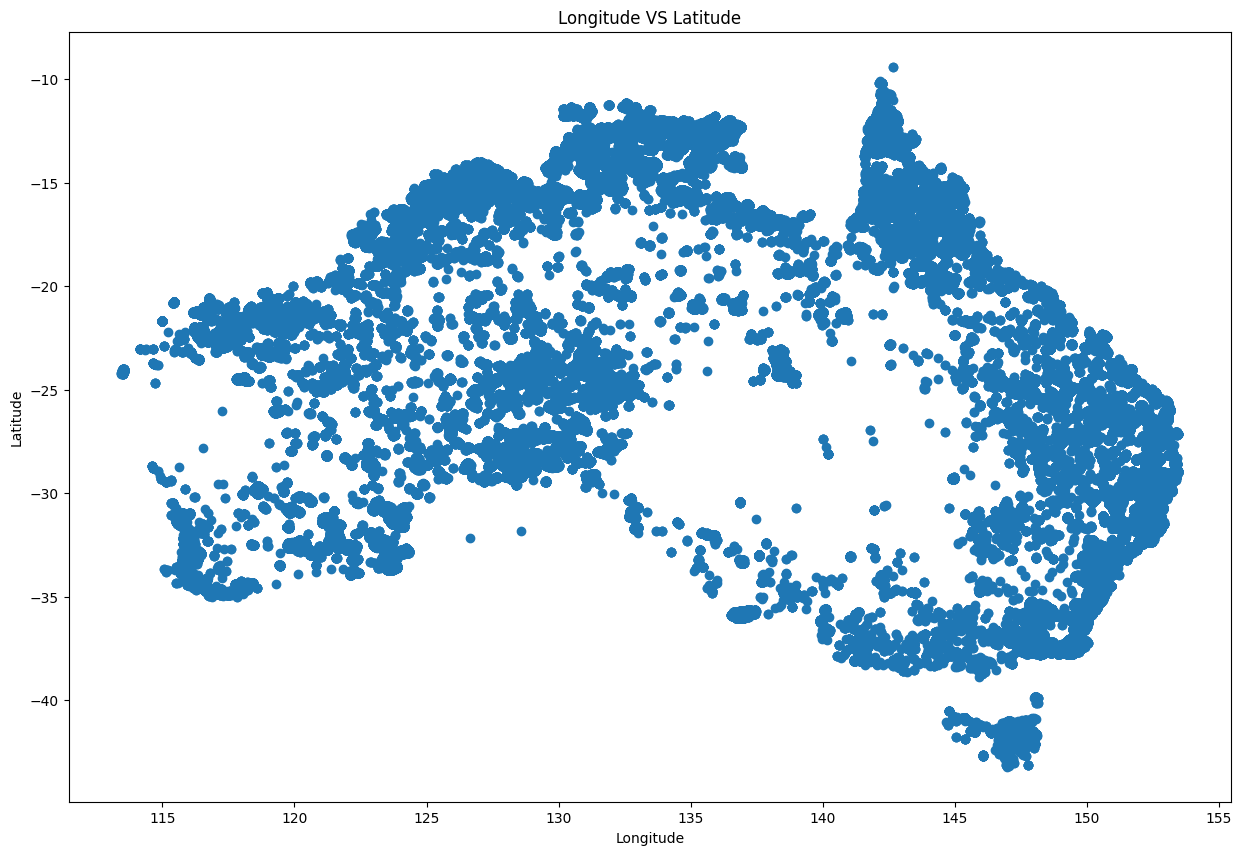

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set_title("Longitude VS Latitude")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.scatter(x=long_data,y=lati_data)

### 2. Adjusting alpha and marker size to compensate for overplotting.

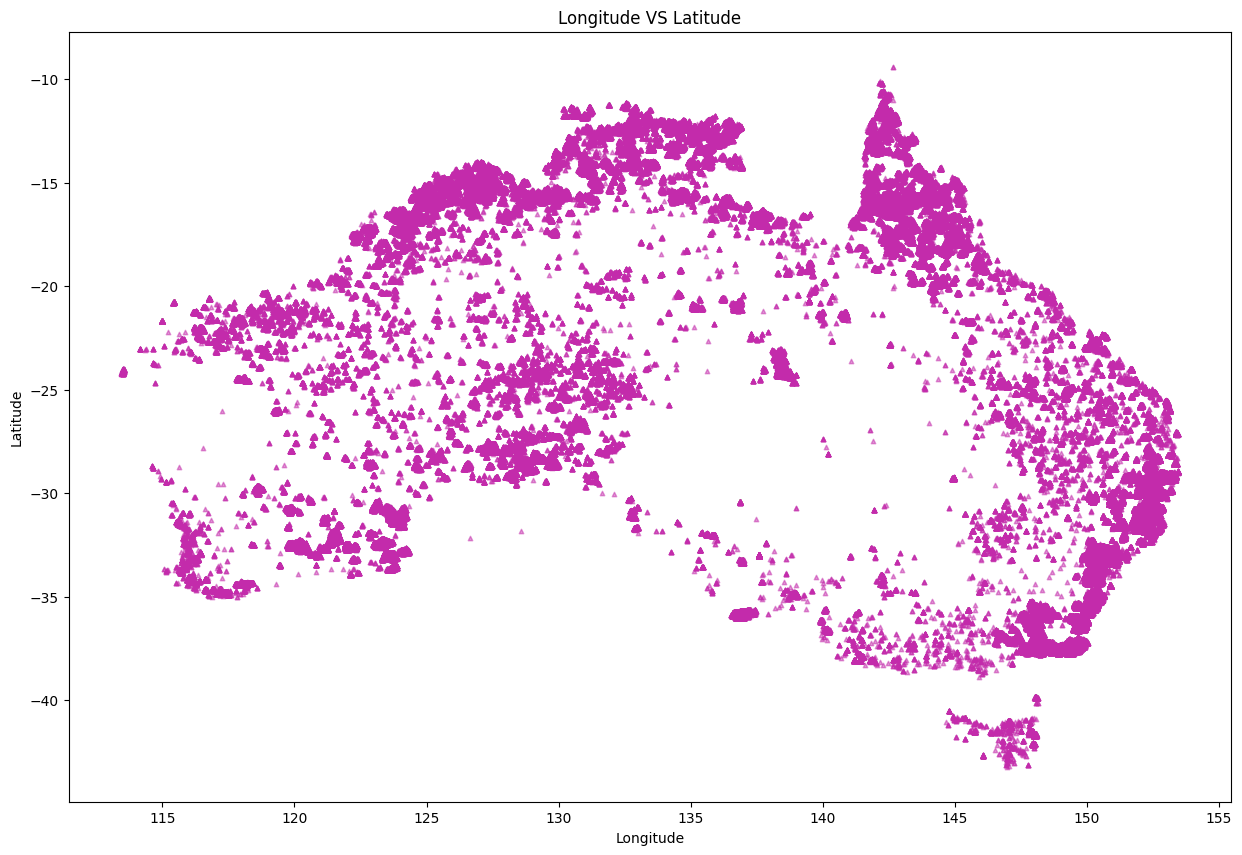

In [76]:
f1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title("Longitude VS Latitude")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.scatter(x=long_data,y=lati_data,marker='^',s=10,alpha=0.5, c= "#c32bab")

### 3. Using a hexbin plot.

In [91]:
xmin = min(long_data)
xmax = max(long_data)
ymin = min(lati_data)
ymax = max(lati_data)

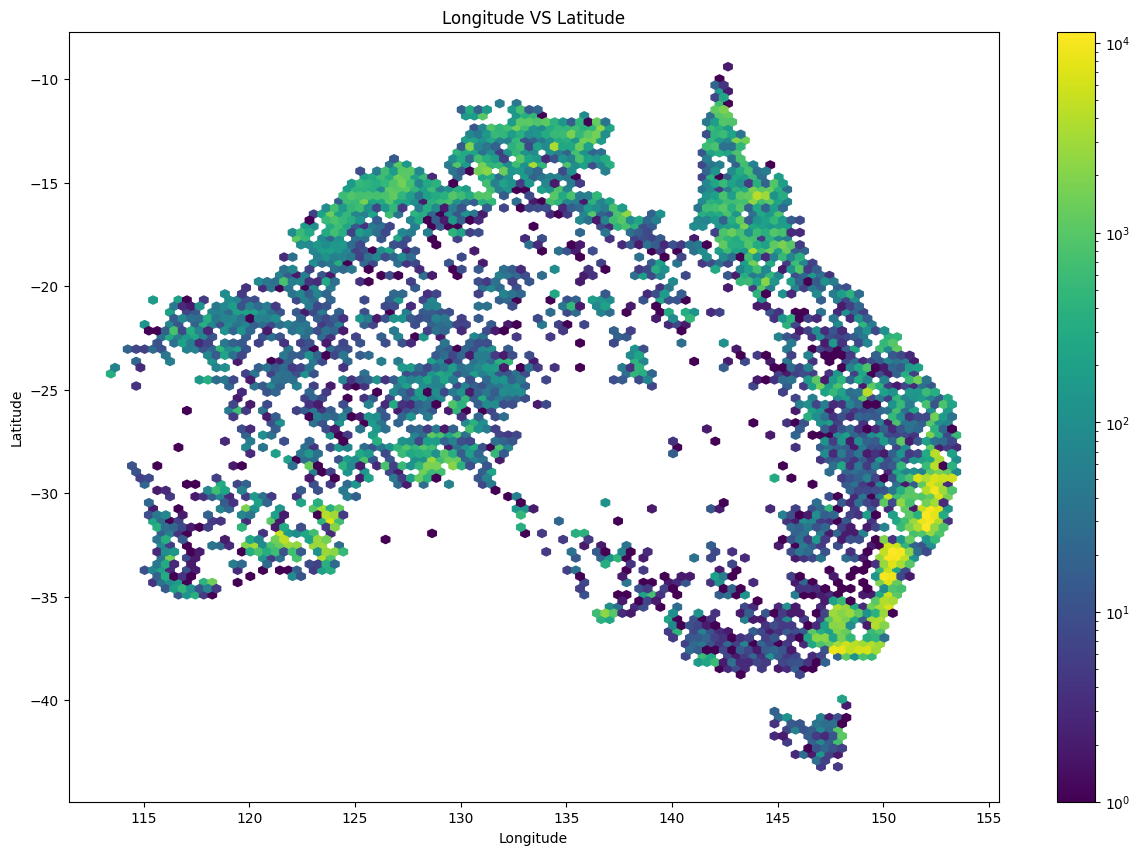

In [104]:
fig2, ax2 = plt.subplots(figsize=(15,10))
plt.hexbin(x=long_data,y=lati_data,bins="log",extent=(xmin,xmax,ymin,ymax))
ax2.set_title("Longitude VS Latitude")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
plt.colorbar()

### 4. Subsampling the dataset.

In [105]:
# SAMPLING
sample = df_data.sample(frac=0.01,random_state=6120)

samp_long = sample.longitude
samp_lati = sample.latitude

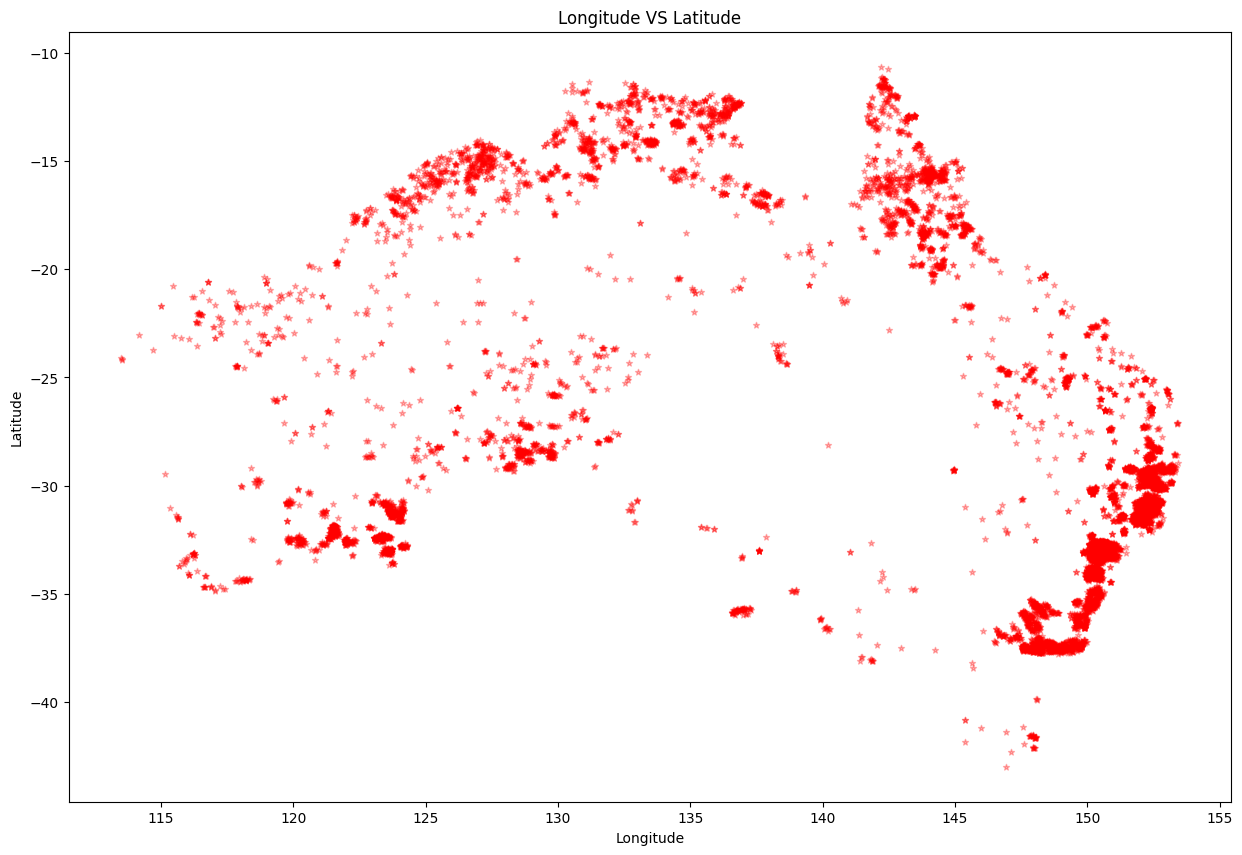

In [109]:
f3, ax3 = plt.subplots(figsize=(15,10))
ax3.set_title("Longitude VS Latitude")
ax3.set_xlabel("Longitude")
ax3.set_ylabel("Latitude")
ax3.scatter(x=samp_long,y=samp_lati,marker='*',s=20,alpha=0.3, c= "#ff0000")

### 1.2) In what areas are most of the anomalies (measurements) located?
- **As we can clearly see from all the above Graphs, majority of measurements are concentrated in south-East Part of the Graph**